# Buying a Game on Steam

## Description
I want to play games on gaming platform and store Steam, but I want to be sure that I invest my time and money wisely. I will use data collected from Steam to answer some questions I have about games and the validity of the review system, and try to figure out what the best indicator is to determine the quality of a game. This was done on Windows 10 OS.

## Data
I shall be using steam_reviews.csv for the project. You can download this data from the following link:

https://www.kaggle.com/luthfim/steam-reviews-dataset

If there isn't currently a folder called "datasets" in your working directory, create one. Extract the CSV file from the downloaded zip and place it in the datasets folder.

### steam_reviews.csv by Luthfi Mahendra
For a limited number of game reviews this file contains: 
* date_posted: Date review was posted
* funny: How many rated the review as funny
* helpful: How many rated the review as helpful
* hour_played: Total hours played by the reviewer before review was posted
* is_early_access_review: Whether the review was during early access (where users can play an unfinished version of the game)
* recommendation: Whether the game was reviewed positively or negatively
* review: The text of the review
* title: The title of the game being reviewed

## Cleaning Process


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool

%matplotlib inline


In [365]:
df = pd.read_csv('datasets/steam_reviews.csv', parse_dates=['date_posted'])

df.head(3)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns


### Removing Samples too small for analysing
Some game titles may have too few reviews, meaning that the sample size is too small and may give misleading conclusions.

In [384]:
title_count = pd.DataFrame(df.groupby('title')['date_posted'].count())
title_count.reset_index(inplace=True)
for title, count in title_count.iterrows():
    if count[1] < 200:
        df = df[df['title'] != count[0]]

title_count

,title,date_posted
0,ASTRONEER,2661
1,Dead by Daylight,22221
2,Euro Truck Simulator 2,501
3,Garry's Mod,202
4,Grand Theft Auto V,99956
5,Insurgency: Sandstorm,220
6,Left 4 Dead 2,221
7,MONSTER HUNTER: WORLD,18412
8,PLAYERUNKNOWN'S BATTLEGROUNDS,145685
9,RESIDENT EVIL 2 / BIOHAZARD RE:2,1385


### Removing duplicates

In [367]:
df.duplicated().sum()

0

There are no duplicates in this data so we do not need to worry about removing them.
### Removing or re-coding incorrect outliers


In [368]:
df.describe()

,funny,helpful,hour_played
count,4.336270e+05,433627.000000,433627.000000
mean,5.348569e+05,0.785740,364.414066
std,4.792609e+07,56.846891,545.036615
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,451.000000
max,4.294967e+09,28171.000000,31962.000000


It is evident there is something wrong with the funny column, as it is unlikely so many reviews have been rated as funny over four billion times. I will replace any entries where funny > 1000000 with funny = 0.

In [369]:
df['funny'].values[df['funny'].values > 1000000] = 0.0

df.describe()

,funny,helpful,hour_played
count,433627.000000,433627.000000,433627.000000
mean,0.321638,0.785740,364.414066
std,19.501211,56.846891,545.036615
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,62.000000
50%,0.000000,0.000000,190.000000
75%,0.000000,0.000000,451.000000
max,7472.000000,28171.000000,31962.000000


### Filling in missing values
First lets see how many missing values are in the dataset.

In [370]:
(df.isna().sum() / df.shape[0]) * 100

date_posted               0.000000
funny                     0.000000
helpful                   0.000000
hour_played               0.000000
is_early_access_review    0.000000
recommendation            0.000000
review                    0.349148
title                     0.000000
dtype: float64

Because we are not using review for analysis, it makes sense to just delete the column. If we were doing natural language analysis on the column then it would be best to fill Null values with an empty string.

In [371]:
del df['review']

In [372]:
(df.isna().sum() / df.shape[0]) * 100

date_posted               0.0
funny                     0.0
helpful                   0.0
hour_played               0.0
is_early_access_review    0.0
recommendation            0.0
title                     0.0
dtype: float64

### Converting categorical data into numerical values
The recommendation column is catagorised by "Recommended" and "Not Recommended". We can convert this into Not Recommended = 0, and Recommended = 1.

In [373]:
df['recommendation'].values[df['recommendation'].values == "Recommended"] = 1
df['recommendation'].values[df['recommendation'].values == "Not Recommended"] = 0
df['recommendation'] = df['recommendation'].astype('Int64')

df.head(3)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title
3,2018-06-14,126,1086,676,False,1,Dead by Daylight
4,2017-06-20,85,2139,612,False,1,Dead by Daylight
5,2016-12-12,4,55,2694,False,1,Dead by Daylight


## Analysis
### 1. What games have the highest mean playtime by reviewers?
### 2. What games have the highest percentage of positive reviews?
### 3. Does a game get better reviews after leaving early access?
### 4. Is a review rated more helpful if the reviewer has played for longer?
### 5. Is there a correlation between funniness and helpfulness?

## Visualizations

In [374]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 500
plt.style.use('seaborn-paper')

Text(0, 0.5, 'Game')

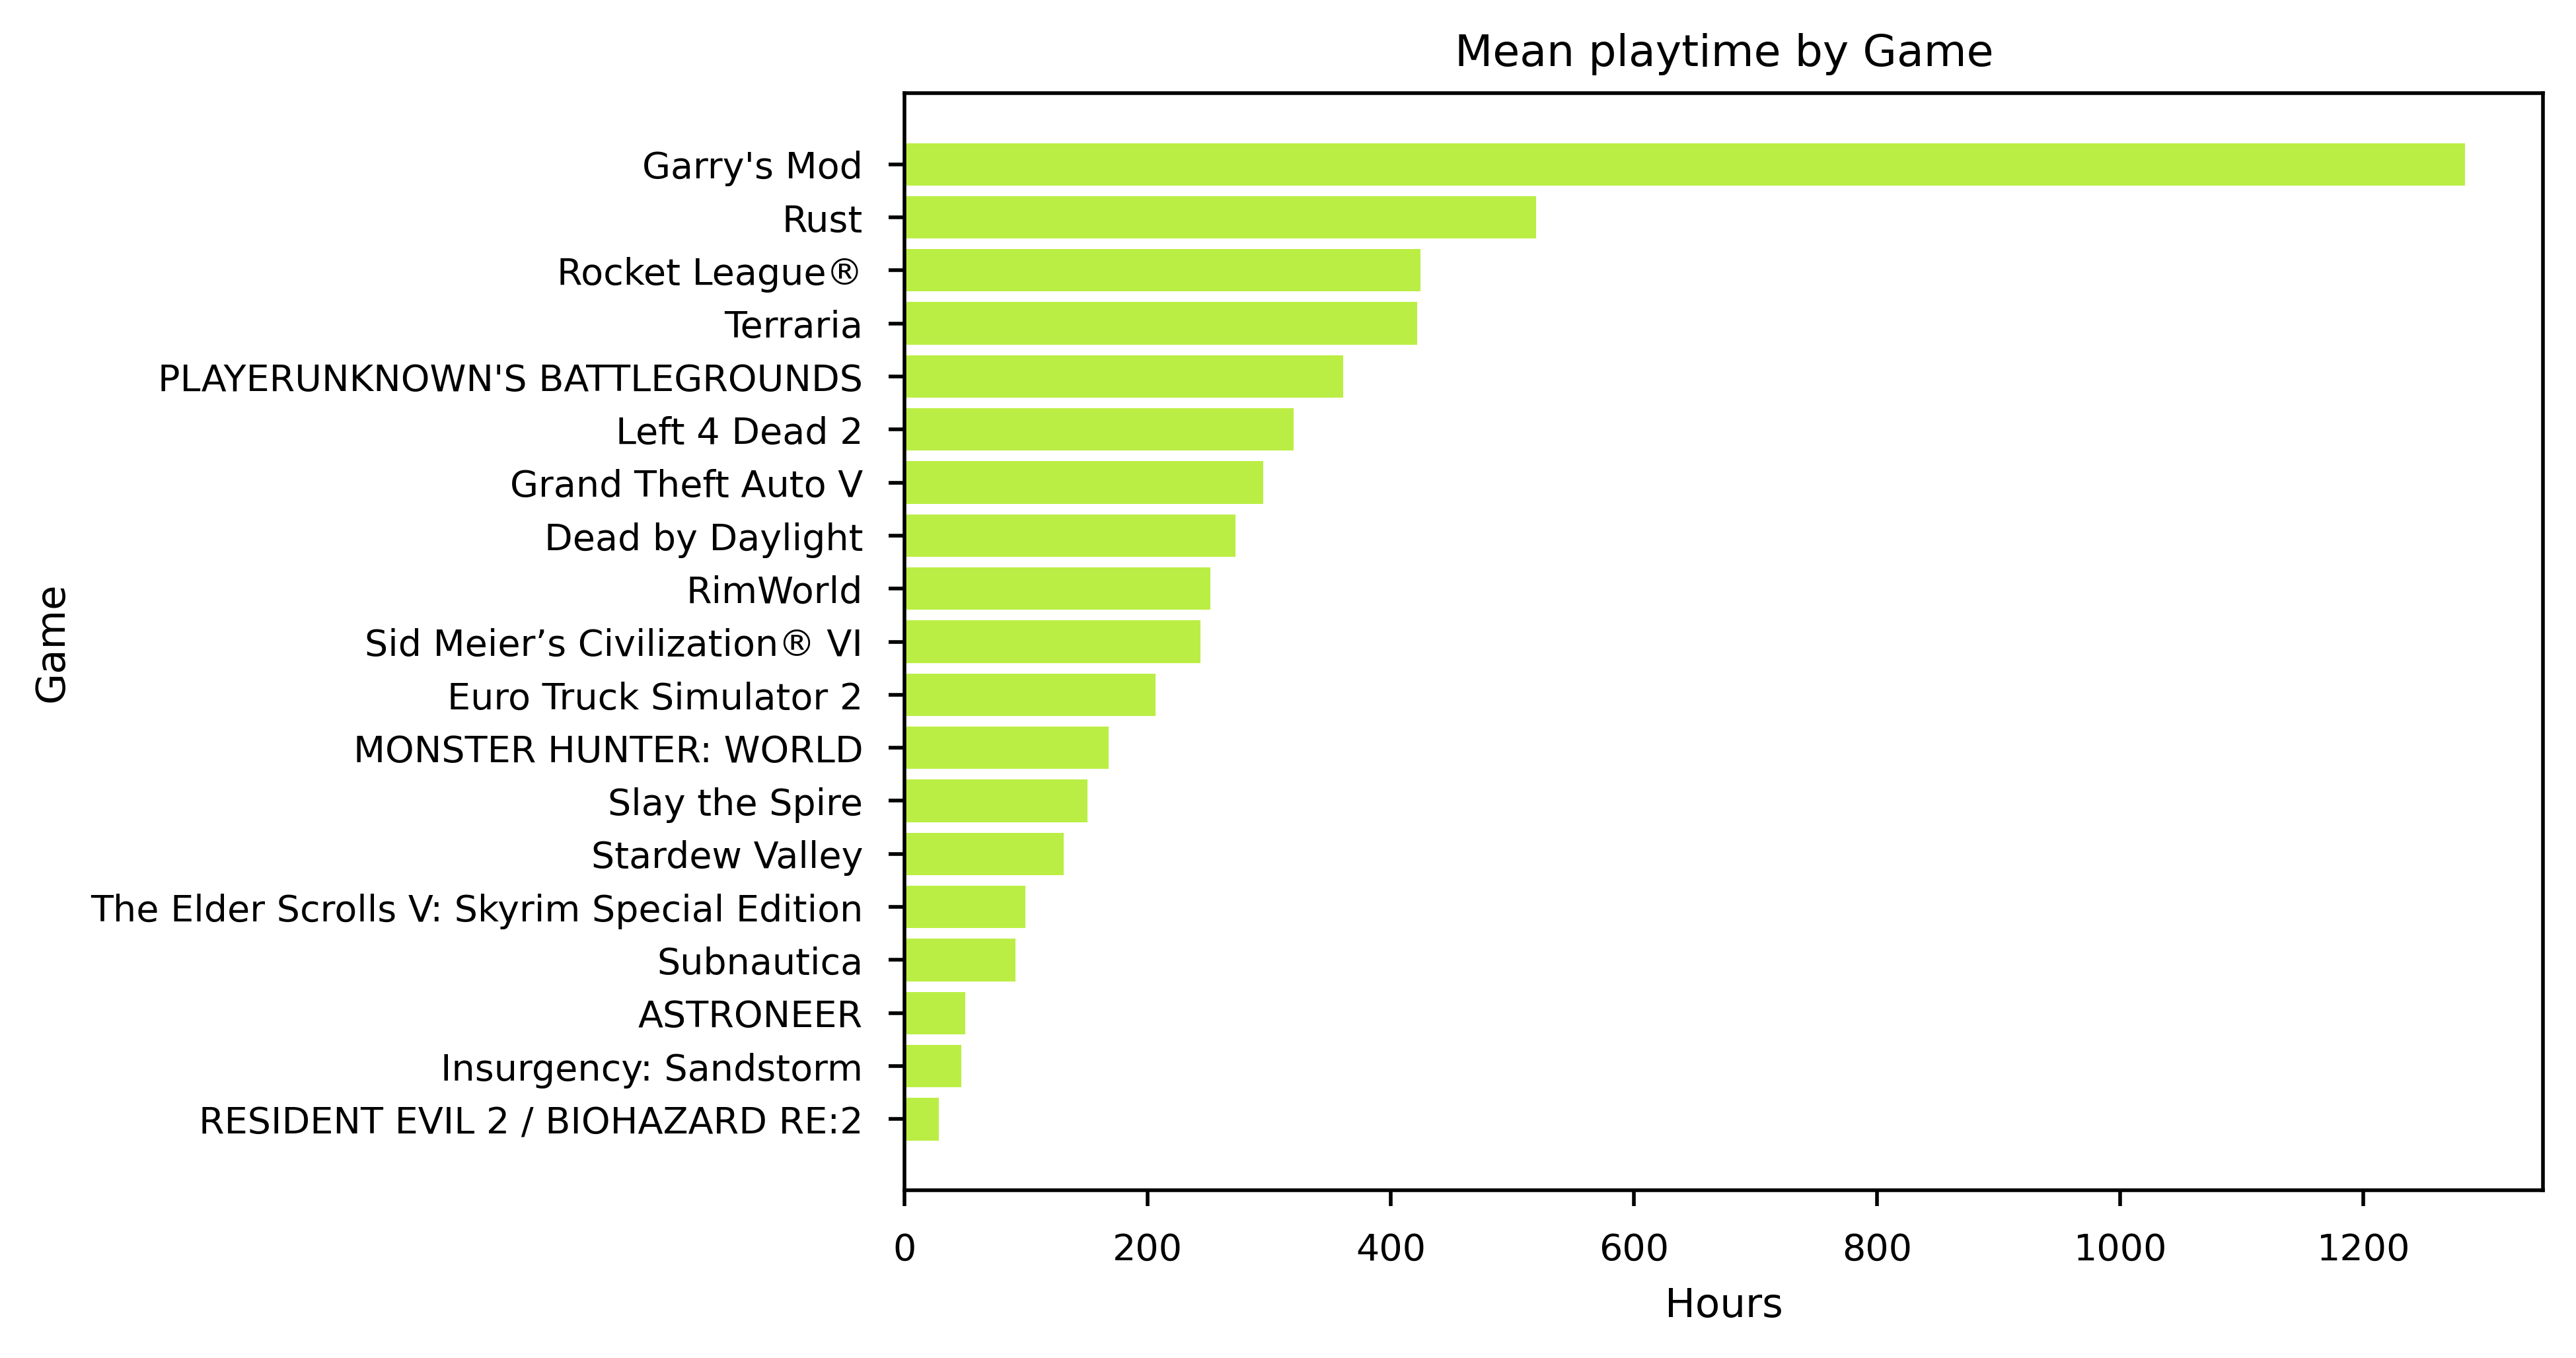

In [375]:
avg_playtime = pd.DataFrame(df.groupby('title')['hour_played'].mean())
avg_playtime.reset_index(inplace=True)
avg_playtime.sort_values(by=['hour_played'], inplace=True)
plt.barh(avg_playtime['title'], avg_playtime['hour_played'], color='#bbee44')
plt.title('Mean playtime by Game')
plt.xlabel('Hours')
plt.ylabel('Game')

Text(0, 0.5, 'Game')

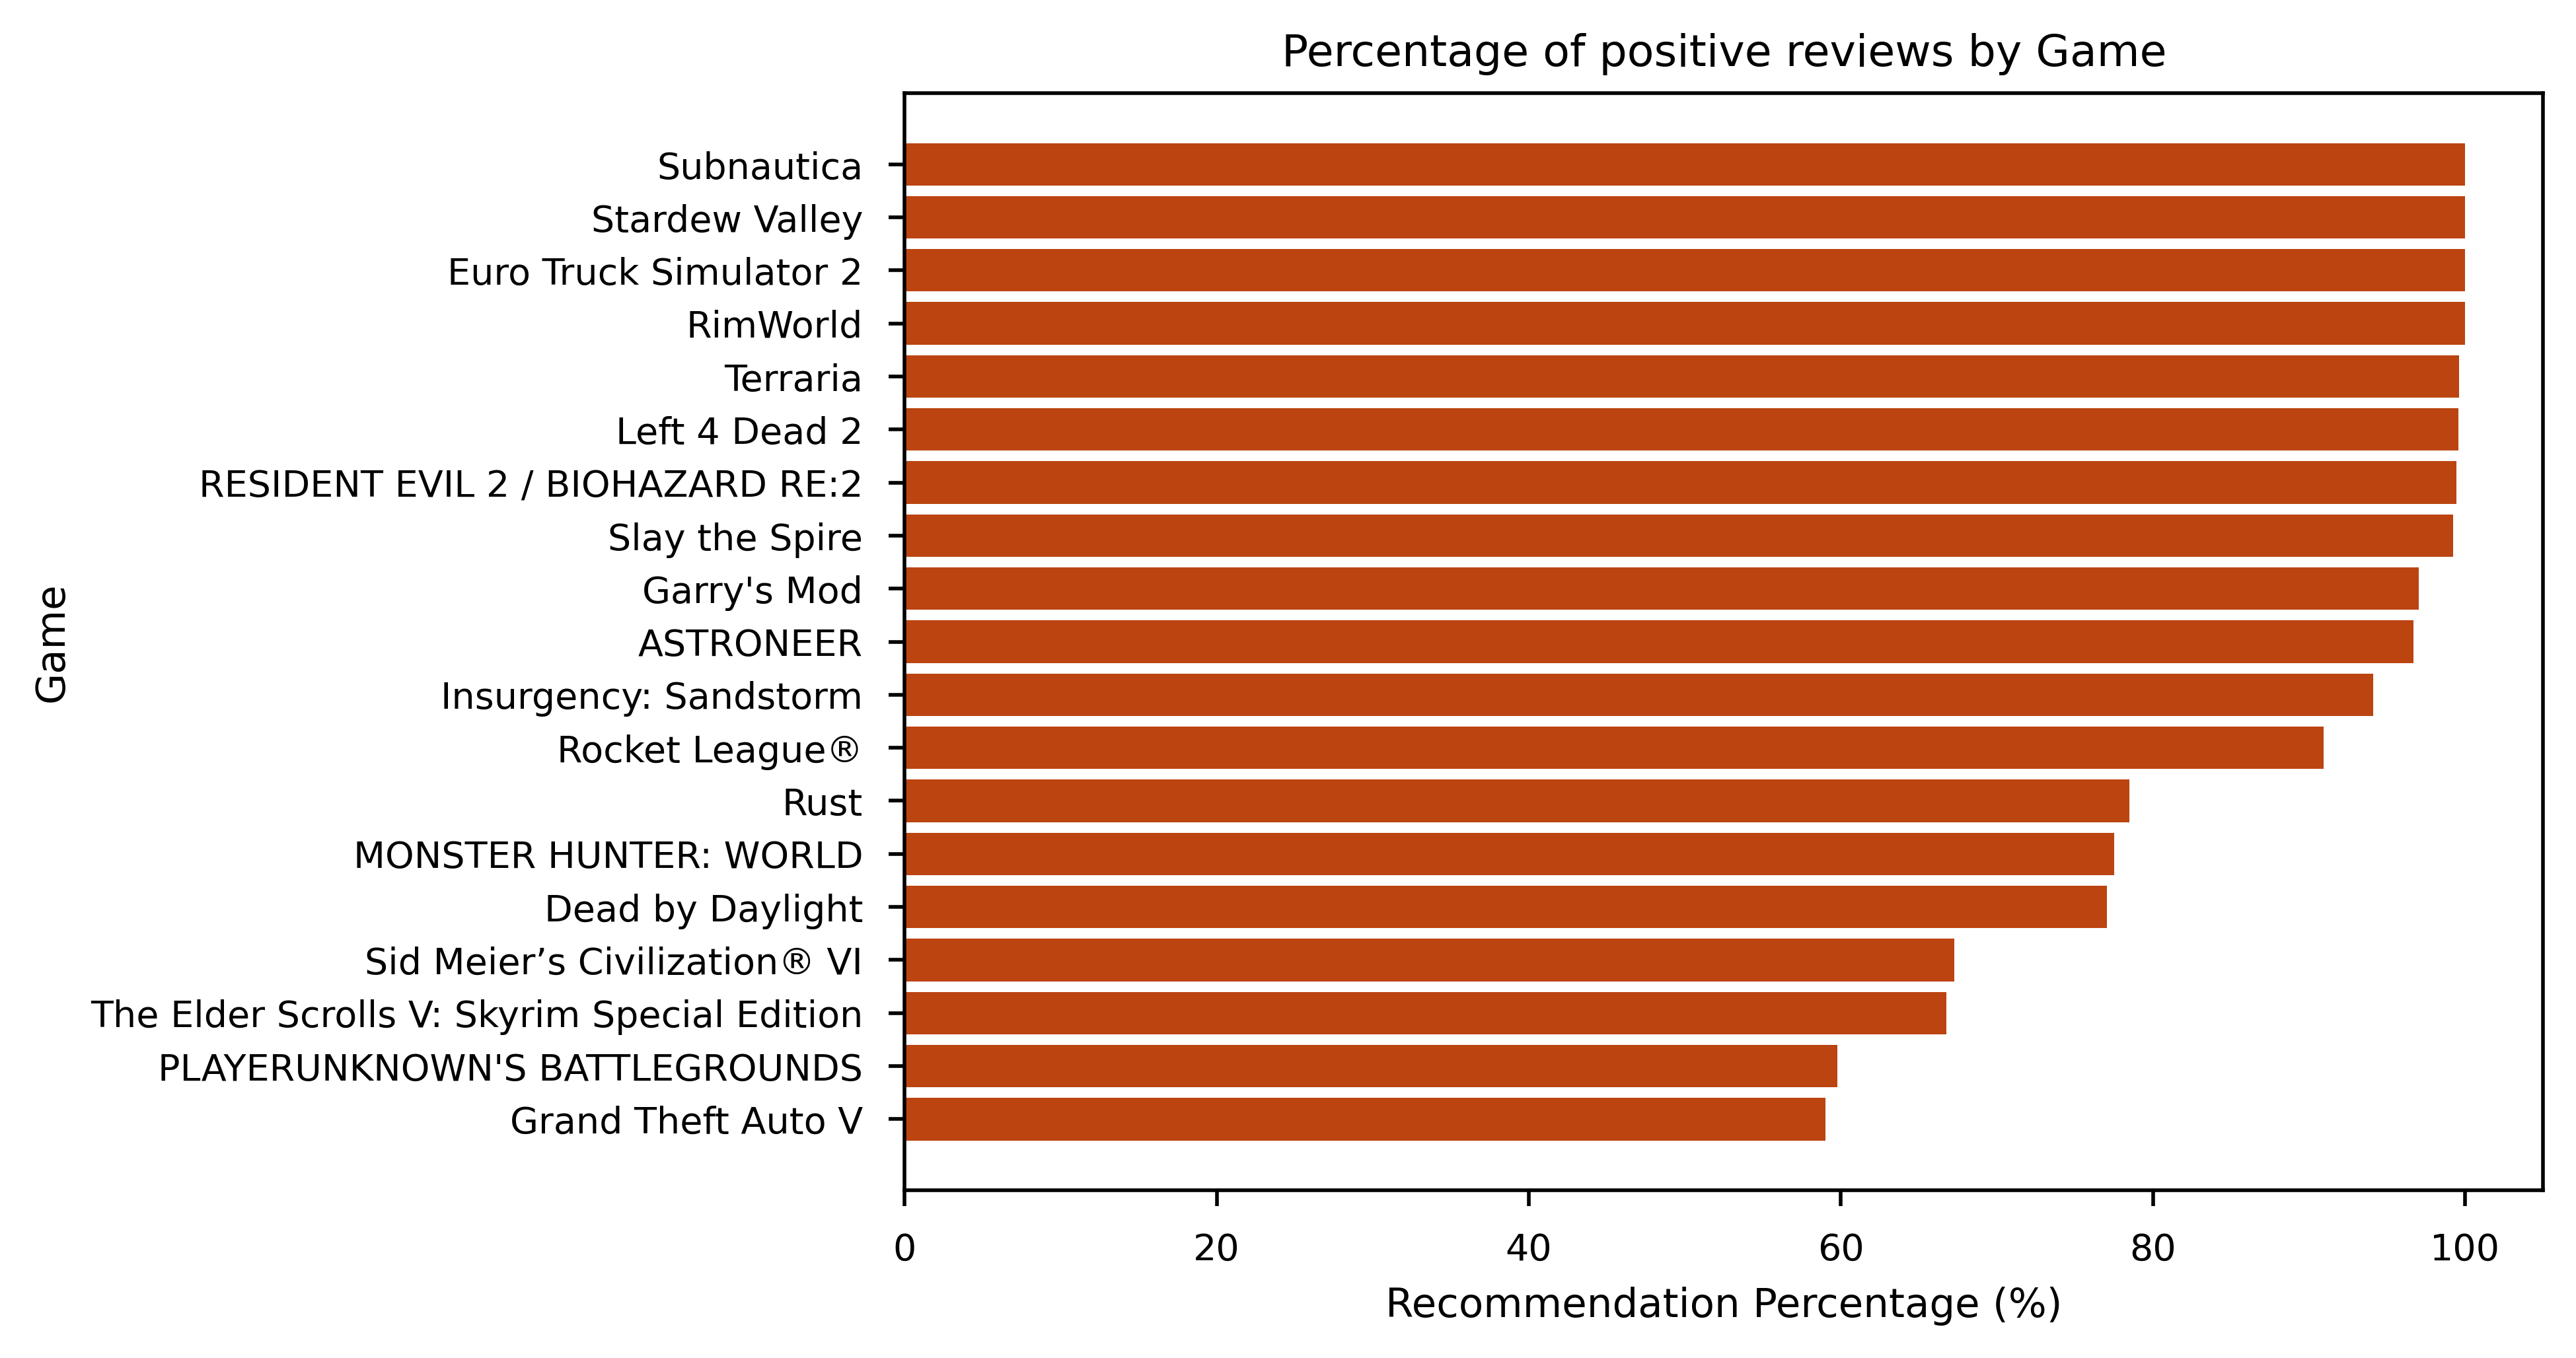

In [376]:
avg_recommend = pd.DataFrame(df.groupby('title')['recommendation'].mean())
avg_recommend.reset_index(inplace=True)
avg_recommend.sort_values(by=['recommendation'], inplace=True)
plt.barh(avg_recommend['title'], avg_recommend['recommendation']*100, color='#bb4411')
plt.title('Percentage of positive reviews by Game')
plt.xlabel('Recommendation Percentage (%)')
plt.ylabel('Game')

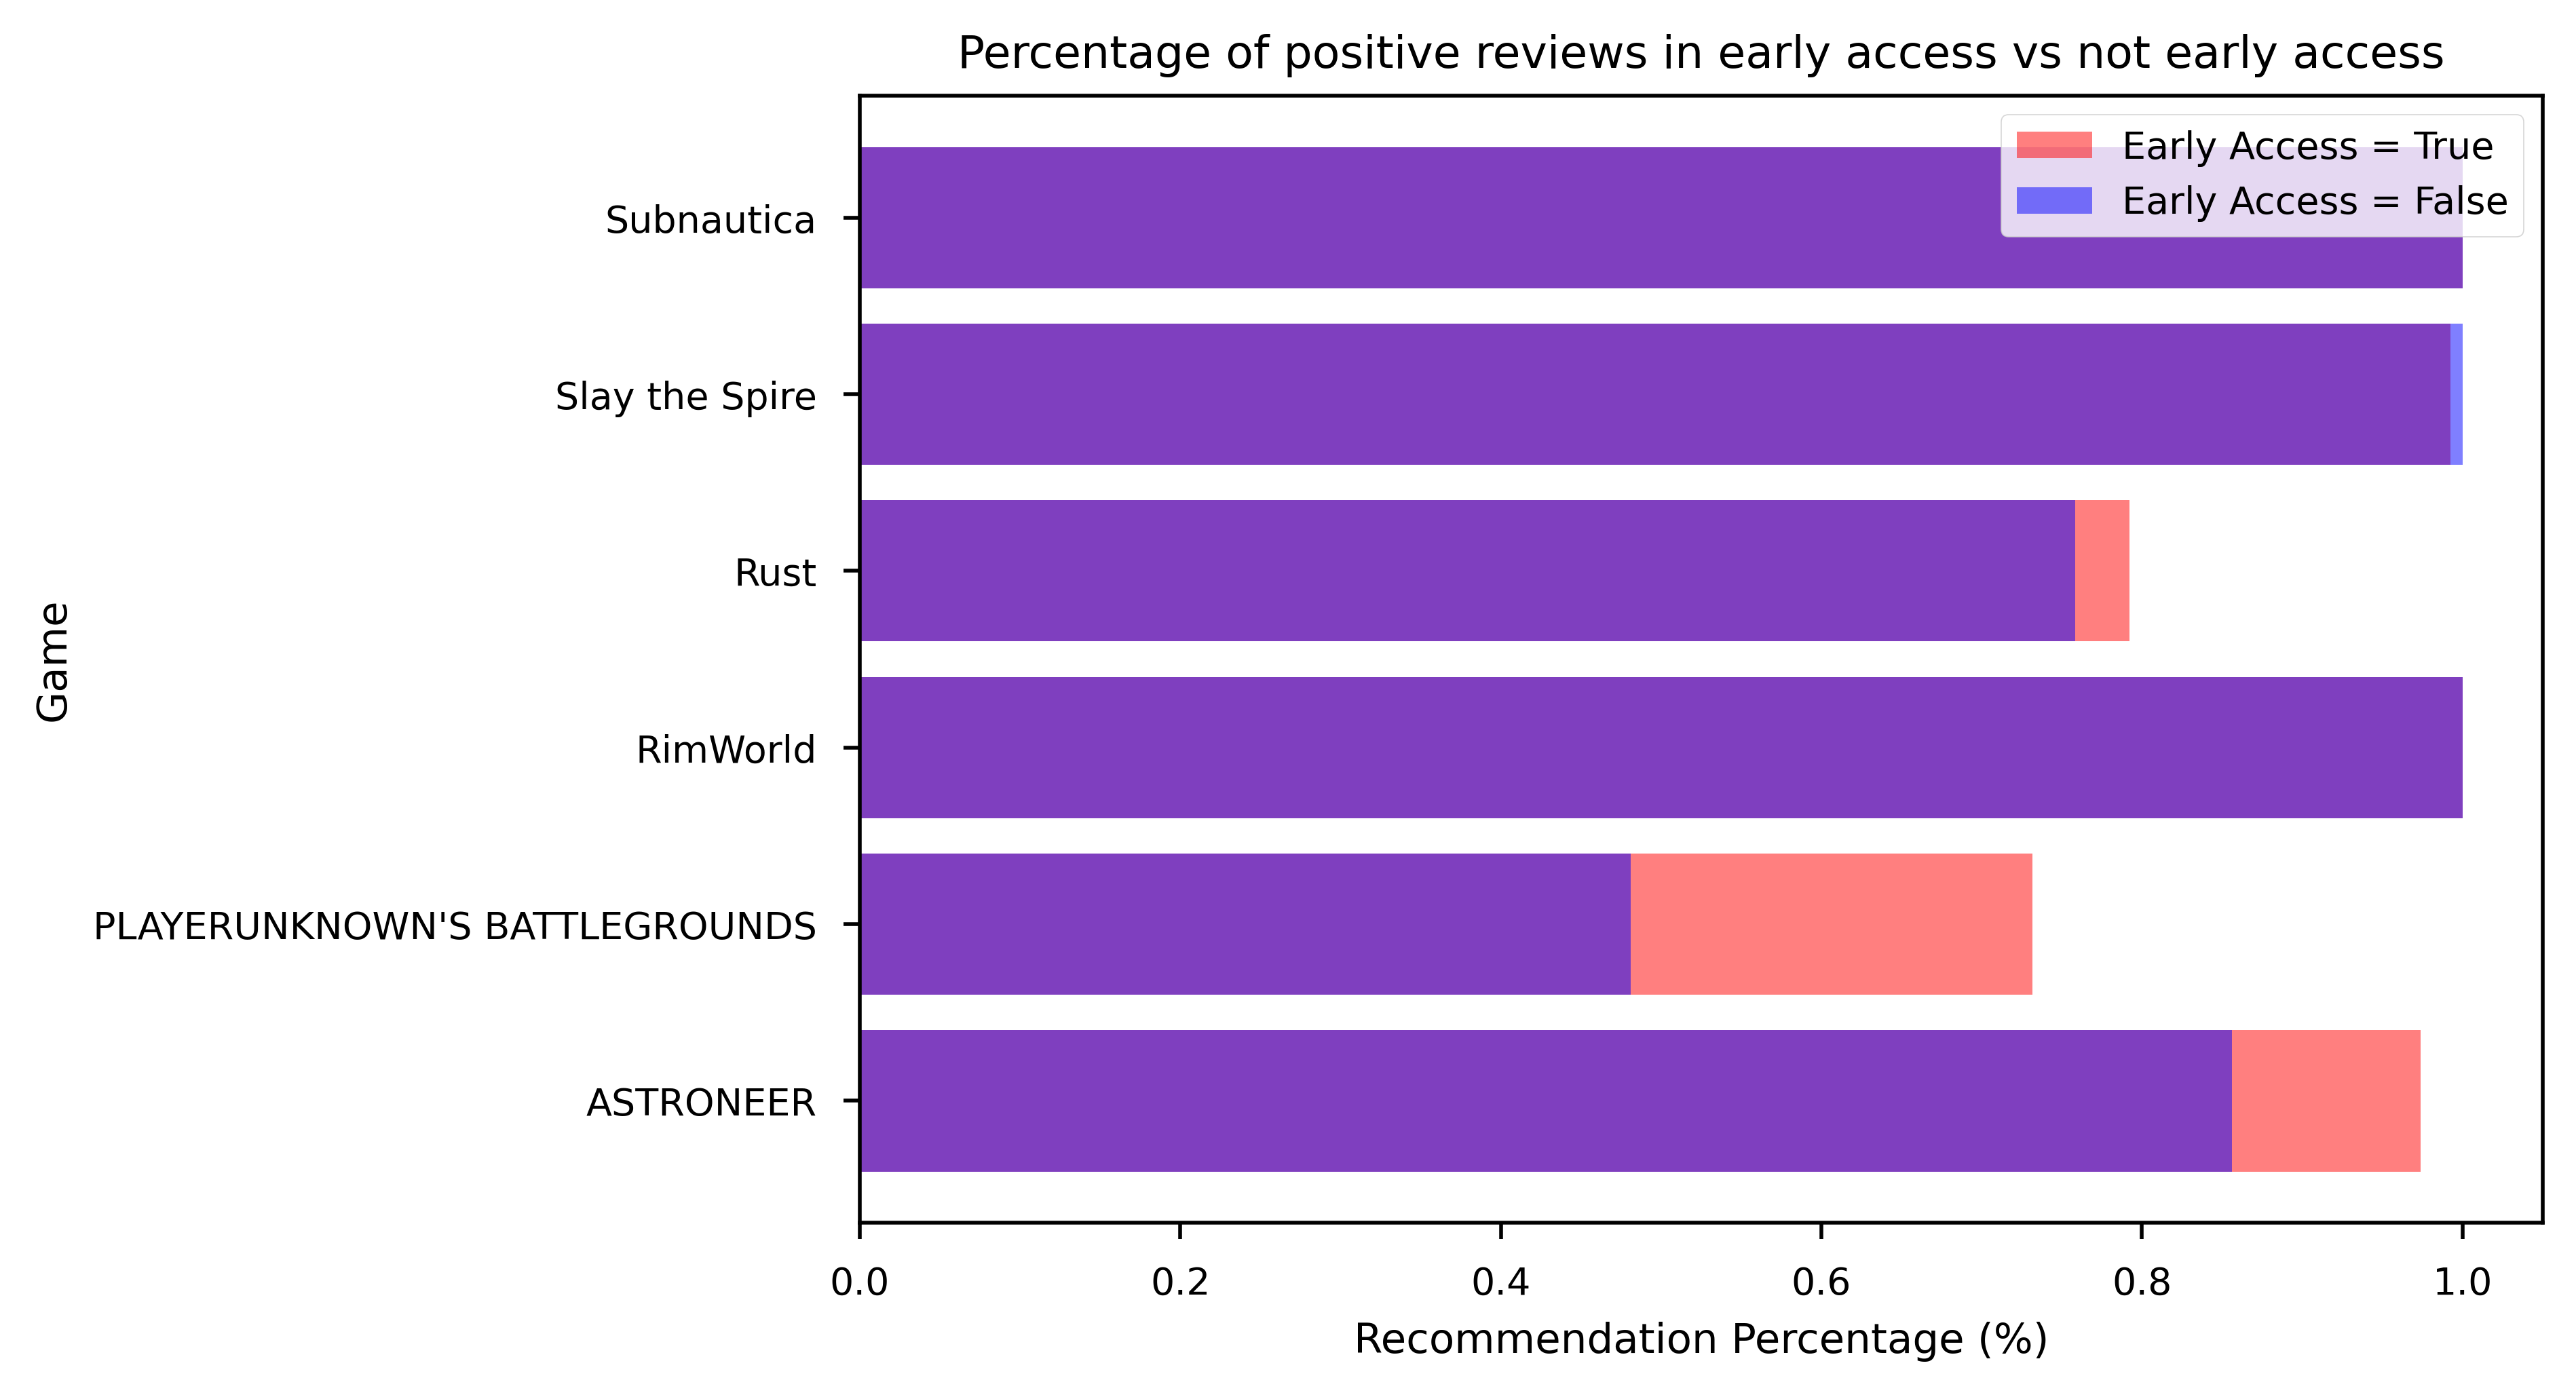

In [377]:
ea_true = df[df['is_early_access_review'] == True]
ea_false = df[df['is_early_access_review'] == False]
avg_recommend_ea_true = pd.DataFrame(ea_true.groupby(['title'])['recommendation'].mean())
avg_recommend_ea_false = pd.DataFrame(ea_false.groupby(['title'])['recommendation'].mean())
avg_recommend_ea_true.reset_index(inplace=True)
avg_recommend_ea_false.reset_index(inplace=True)
avg_ea_merge = pd.merge(avg_recommend_ea_true, avg_recommend_ea_false, on='title', how='inner')

fig, ax = plt.subplots()

ax.barh(avg_ea_merge['title'], avg_ea_merge['recommendation_x'], label="Early Access = True", color='red', alpha=0.5, align='center')
ax.barh(avg_ea_merge['title'], avg_ea_merge['recommendation_y'], label="Early Access = False", color='blue', alpha=0.5, align='center')

plt.title('Percentage of positive reviews in early access vs not early access')
plt.xlabel('Recommendation Percentage (%)')
plt.ylabel('Game')
plt.legend()


In [378]:
output_file('graph4.html')

pd.set_option('display.max_columns', None)

hover = HoverTool(tooltips=None, mode='hline')

# the crosshair option gives us a cross to hover with
helpful_time = figure(
    title='Relationship between Helpfulness and Time Played',
    x_axis_label='Helpfulness',
    y_axis_label='Time Played')

# we can add color to the hover tool with hover_color parameter
helpful_time.circle(df['helpful'], 
             df['hour_played'],
             size=4)

show(helpful_time)

In [379]:
output_file('graph5.html')
# the crosshair option gives us a cross to hover with
helpful_funny = figure(
    title='Relationship between Helpfulness and Funniness',
    x_axis_label='Helpfulness',
    y_axis_label='Funniness')

# we can add color to the hover tool with hover_color parameter
helpful_funny.diamond(df['helpful'], 
             df['funny'],
             size=4)

show(helpful_funny)

## Conclusions
### 1. What games have the highest mean playtime by reviewers?
Garry's mod wins by a substantial margin, with rust averaging not even half of the average hours. I do not believe that this necessarily indicates that Garry's Mod is the best game on steam, but it must be addictive.
### 2. What games have the highest percentage of positive reviews?
This is interesting in contrast with the first graph. You can see that RESIDENT EVIL 2 is one of the least played games, however it has a nearly perfect rating. In fact, many of the games that are played for less time getting higher scores. This may be because the less the game is played the less chance there is of discovering one of its flaws. It may also be that the experience is compact and complete, and does not require a long time investment.
### 3. Does a game get better reviews after leaving early access?
I was pleasantly surprised by this, as I had every expectation that after a game has come out of early access and is regarded by the developers as complete, the reviews would be better aswell. What is seen in the visualization is that reviews did not get much better for any of the games (although they were quite high to begin with), if there was an improvement it was very insignificant. There were very significant negative shifts in reviews after leaving early access however, esspecially with PLAYERUNKNOWN'S BATTLEGROUNDS and ASTRONEER. While I can only guess what this can be attributed to, I imagine that reviews may be more lenient with flaws when a game is marked as incomplete.
### 4. Is a review rated more helpful if the reviewer has played for longer?
It is clear that there is no correlation between a helpful reviewer and a reviewer who has played for a long time.
### 5. Is there a correlation between funniness and helpfulness?
There seems to be an indication that there is a correlation between funniness and helpfulness. This is most likely due to the fact that a review recieves more attention the more highly rated it is in helpfulness and funniness. The data also indicates that most reviews are considered helpful more than funny, and there are no reviews that a just funny without being helpful also.

### What can we deduce from these conclusions?
To me, the best game should not be in early access, as this indicates that reviews may be inaccurate. I don't believe the credibility of a positive or negative review should come into question depending on how long that user has played the game for. Finally, I think that just because a review is humourous, it does not imply that it is not credible.

## Future Work
In the future I would like to work with a more complete dataset for steam reviews so that more accurate conclusions can be drawn about a more diverse set of games. To do this I may need to develop my own program for data extraction using the steam API. I would also be interesting to do some work with spotify data as it's API is supposedly very well written.